### About this Dataset

The dataset for this problem can be downloaded from the following link:

https://drive.google.com/open?id=18Dsja5_1jRY1GnWoORXFFKGTJhylk6rJ

**This is another customer segmentation problem. Basically we will try hierarchical clustering ustilizing scipy and sklearn.**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../shopping_data.csv')

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only three of these five columns: Age, the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. See the plots below, which tell us why Genre is not good feature as they are not adding much information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
plt.style.use('ggplot')

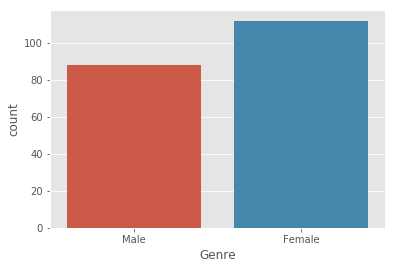

In [10]:
sns.countplot(df['Genre'])

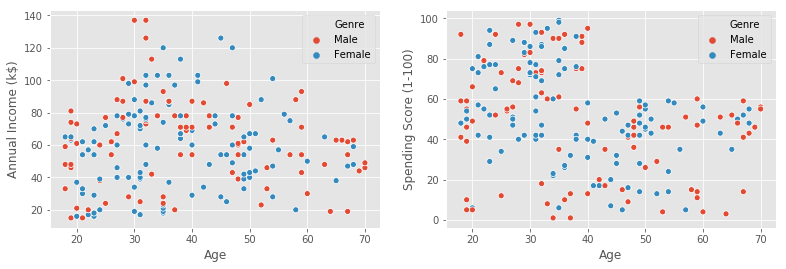

In [25]:
fig = plt.figure(figsize=(13,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.scatterplot(x=df['Age'],y=df['Annual Income (k$)'], hue=df['Genre'],ax=ax1)
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'], hue=df['Genre'],ax=ax2)

**Feature selections**

In [118]:
X = df.values[:,2:]

In [119]:
X[0:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16, 6],
       [23, 16, 77],
       [31, 17, 40]], dtype=object)

**Elbow** and **K means**

In [120]:
from sklearn.cluster import KMeans
distortion = []
K = range(1,11)

for k in K:
    kmeanModel=KMeans(n_clusters=k, init='k-means++', random_state=0).fit(X)
    kmeanModel.fit(X)
    distortion.append(kmeanModel.inertia_)

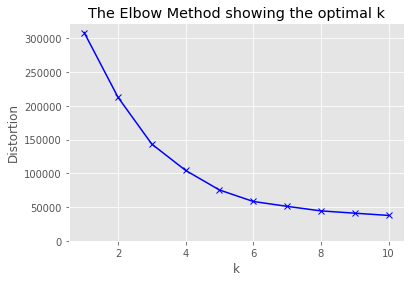

In [121]:
plt.plot(K, distortion, 'bx-')
plt.xlabel('k')
plt.ylim(0)
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We will use k=5.

In [122]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=300)

In [123]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=300, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [124]:
labels = kmeans.labels_
print(labels)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


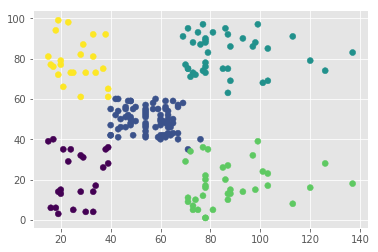

In [125]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=kmeans.labels_)

**Nicely clustered into 5 groups!**

Now **Hierarchical clustering** using **sklearn**

In [126]:
from sklearn.cluster import AgglomerativeClustering

In [127]:
agg = AgglomerativeClustering(n_clusters=5)

In [128]:
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [129]:
agg.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

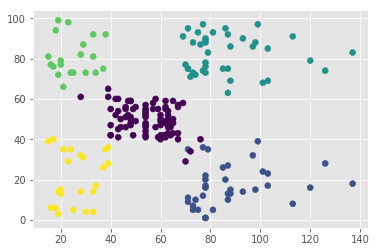

In [130]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=agg.labels_)

**Hierarchical clustering** gives similar results as of K means! Now lets see the **dendrogram**. For this we have to use scipy.

In [134]:
from scipy.cluster import hierarchy 

In [135]:
import scipy.cluster.hierarchy
Z = hierarchy.linkage(X, method='complete')

In [136]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 5, 4, 5, 4, 5, 4,
       3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

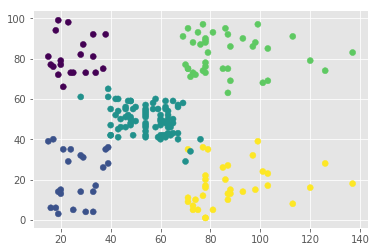

In [137]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=clusters)

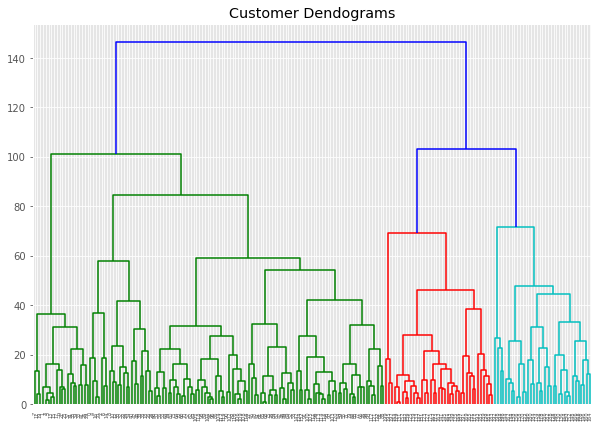

In [138]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = hierarchy.dendrogram(Z)

Dandogram also good way to visualize the number of clusters. One can see the data points in the form of five clusters. 